In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [84]:
data = pd.read_csv('/content/dataset (1).csv')
data.head()

VIN (1-10)     County      City State  Postal Code  Model Year       Make  \
0  JTMEB3FV6N     Monroe  Key West    FL        33040        2022     TOYOTA   
1  1G1RD6E45D      Clark  Laughlin    NV        89029        2013  CHEVROLET   
2  JN1AZ0CP8B     Yakima    Yakima    WA        98901        2011     NISSAN   
3  1G1FW6S08H     Skagit  Concrete    WA        98237        2017  CHEVROLET   
4  3FA6P0SU1K  Snohomish   Everett    WA        98201        2019       FORD   

        Model                   Electric Vehicle Type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
2        LEAF          Battery Electric Vehicle (BEV)   
3     BOLT EV          Battery Electric Vehicle (BEV)   
4      FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible              42   
1           Clean Alternative Fuel Vehicle Eligible              38   
2           Clean Alternative Fuel Vehicle Eligible              73   
3           Clean Alternative Fuel Vehicle Eligible             238   
4             Not eligible due to low battery range              26   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                   NaN       198968248   
1          0                   NaN         5204412   
2          0                  15.0       218972519   
3          0                  39.0       186750406   
4          0                  38.0         2006714   

              Vehicle Location        Electric Utility  2020 Census Tract  
0    POINT (-81.80023 24.5545)                     NaN        12087972100  
1  POINT (-114.57245 35.16815)                     NaN        32003005702  
2  POINT (-120.50721 46.60448)              PACIFICORP        53077001602  
3   POINT (-121.7515 48.53892)  PUGET SOUND ENERGY INC        53057951101  
4  POINT (-122.20596 47.97659)  PUGET SOUND ENERGY INC        53061041500

In [85]:
data.duplicated().sum()

0

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [87]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64

In [88]:
data.dropna(inplace=True)
data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [89]:
data.sample(6)

VIN (1-10)   County               City State  Postal Code  Model Year  \
67580   1N4AZ1CP8L     King             Auburn    WA        98092        2020   
41312   YV4ED3UR7M   Kitsap           Kingston    WA        98346        2021   
103867  7SAYGDEE8N     King           Bellevue    WA        98005        2022   
77437   1G1RD6E4XD  Whatcom           Ferndale    WA        98248        2013   
111978  3FA6P0PU7E   Kitsap  Bainbridge Island    WA        98110        2014   
55688   5YJYGDEE5M     King          Sammamish    WA        98075        2021   

             Make    Model                   Electric Vehicle Type  \
67580      NISSAN     LEAF          Battery Electric Vehicle (BEV)   
41312       VOLVO     XC40          Battery Electric Vehicle (BEV)   
103867      TESLA  MODEL Y          Battery Electric Vehicle (BEV)   
77437   CHEVROLET     VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
111978       FORD   FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   
55688       TESLA  MODEL Y          Battery Electric Vehicle (BEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
67580             Clean Alternative Fuel Vehicle Eligible             149   
41312   Eligibility unknown as battery range has not b...               0   
103867  Eligibility unknown as battery range has not b...               0   
77437             Clean Alternative Fuel Vehicle Eligible              38   
111978              Not eligible due to low battery range              19   
55688   Eligibility unknown as battery range has not b...               0   

        Base MSRP  Legislative District  DOL Vehicle ID  \
67580           0                  31.0       126105367   
41312           0                  23.0       168492551   
103867          0                  41.0       204707317   
77437           0                  42.0         9553225   
111978          0                  23.0       250050846   
55688           0                  41.0       132808413   

                   Vehicle Location  \
67580   POINT (-122.17663 47.32326)   
41312   POINT (-122.49771 47.79803)   
103867   POINT (-122.1621 47.64441)   
77437   POINT (-122.59351 48.84756)   
111978    POINT (-122.521 47.62728)   
55688   POINT (-122.03539 47.61344)   

                                         Electric Utility  2020 Census Tract  
67580       PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)        53033031204  
41312                              PUGET SOUND ENERGY INC        53035090102  
103867      PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)        53033023500  
77437   PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...        53073010504  
111978                             PUGET SOUND ENERGY INC        53035091002  
55688       PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)        53033032218

In [90]:
num_columns = data.select_dtypes(include = ['int', 'float'])
cat_columns = data.select_dtypes(include = ['object'])

In [91]:
num_columns.head()

Postal Code  Model Year  Electric Range  Base MSRP  Legislative District  \
2        98901        2011              73          0                  15.0   
3        98237        2017             238          0                  39.0   
4        98201        2019              26          0                  38.0   
5        98021        2018             215          0                   1.0   
6        98203        2013              75          0                  38.0   

   DOL Vehicle ID  2020 Census Tract  
2       218972519        53077001602  
3       186750406        53057951101  
4         2006714        53061041500  
5       475635324        53061051916  
6       253546023        53061040900

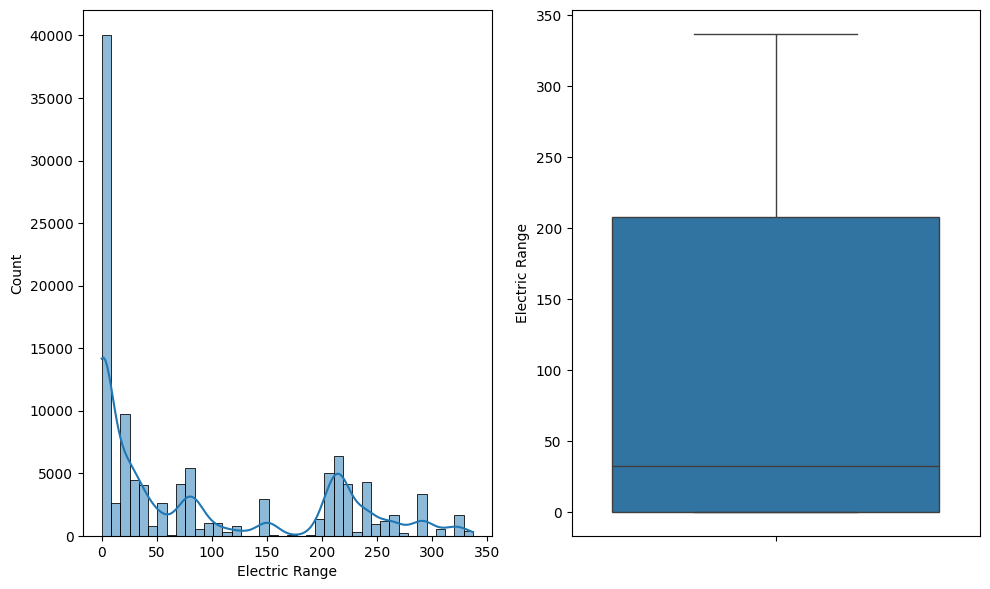

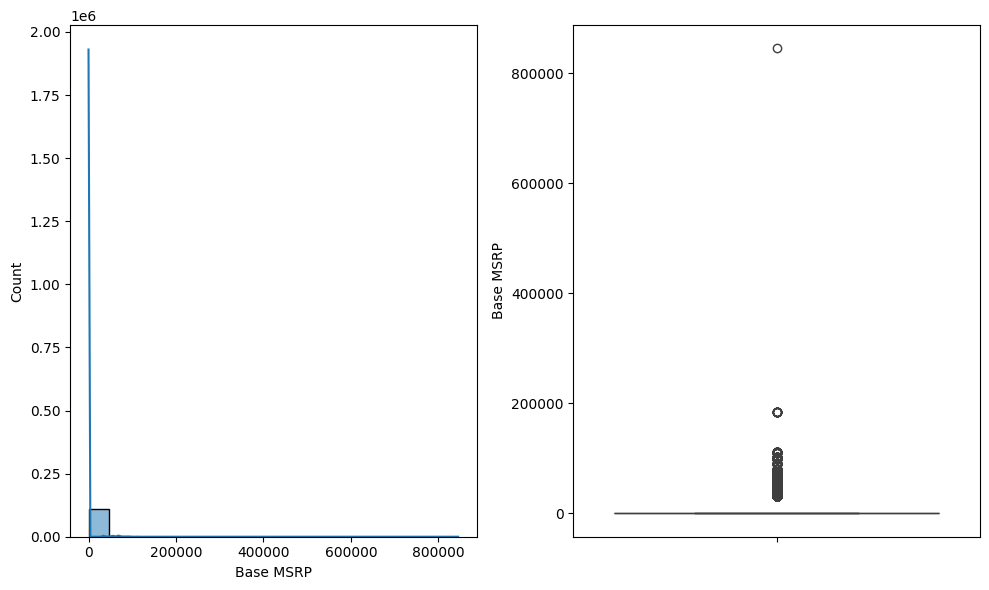

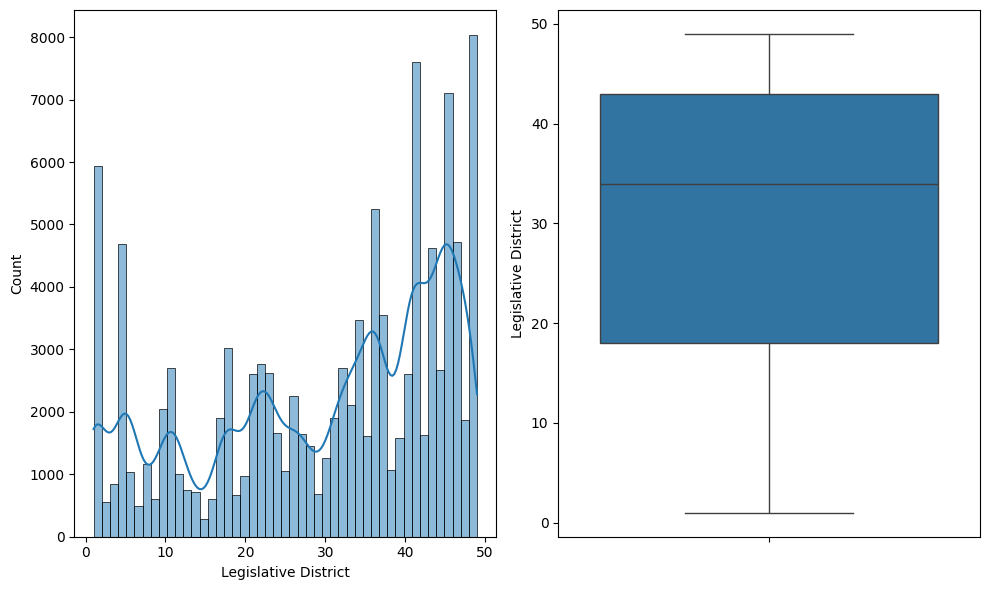

In [92]:
for col in num_columns.iloc[:, 2:5].columns:
  plt.figure(figsize = (10, 6))
  plt.subplot(1, 2, 1)
  sns.histplot(num_columns[col], kde = True)

  plt.subplot(1, 2, 2)
  sns.boxplot(num_columns[col])


  plt.tight_layout()
  plt.show()

In [93]:
num_columns.iloc[:, 2:5].describe()

Electric Range      Base MSRP  Legislative District
count   112152.000000  112152.000000         112152.000000
mean        87.829651    1793.882320             29.817703
std        102.336645   10785.259118             14.698726
min          0.000000       0.000000              1.000000
25%          0.000000       0.000000             18.000000
50%         32.000000       0.000000             34.000000
75%        208.000000       0.000000             43.000000
max        337.000000  845000.000000             49.000000

In [94]:
cat_columns.head()

VIN (1-10)     County      City State       Make    Model  \
2  JN1AZ0CP8B     Yakima    Yakima    WA     NISSAN     LEAF   
3  1G1FW6S08H     Skagit  Concrete    WA  CHEVROLET  BOLT EV   
4  3FA6P0SU1K  Snohomish   Everett    WA       FORD   FUSION   
5  5YJ3E1EB5J  Snohomish   Bothell    WA      TESLA  MODEL 3   
6  1N4AZ0CP4D  Snohomish   Everett    WA     NISSAN     LEAF   

                    Electric Vehicle Type  \
2          Battery Electric Vehicle (BEV)   
3          Battery Electric Vehicle (BEV)   
4  Plug-in Hybrid Electric Vehicle (PHEV)   
5          Battery Electric Vehicle (BEV)   
6          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  \
2           Clean Alternative Fuel Vehicle Eligible   
3           Clean Alternative Fuel Vehicle Eligible   
4             Not eligible due to low battery range   
5           Clean Alternative Fuel Vehicle Eligible   
6           Clean Alternative Fuel Vehicle Eligible   

              Vehicle Location        Electric Utility  
2  POINT (-120.50721 46.60448)              PACIFICORP  
3   POINT (-121.7515 48.53892)  PUGET SOUND ENERGY INC  
4  POINT (-122.20596 47.97659)  PUGET SOUND ENERGY INC  
5   POINT (-122.18384 47.8031)  PUGET SOUND ENERGY INC  
6  POINT (-122.23019 47.94949)  PUGET SOUND ENERGY INC

In [95]:
for col in cat_columns.columns:
  print(f"value counts of {col}")
  print(data[col].value_counts())
  print("*" * 10)

value counts of VIN (1-10)
VIN (1-10)
5YJYGDEE9M    471
5YJYGDEE0M    463
5YJYGDEE7M    447
5YJYGDEE8M    446
5YJYGDEE2M    435
             ... 
YV4BR0DL8M      1
JTJHKCFZ5N      1
WA1J2BFZ3N      1
KNDC4DLC5P      1
WA1LAAGE5M      1
Name: count, Length: 7522, dtype: int64
**********
value counts of County
County
King            58980
Snohomish       12412
Pierce           8525
Clark            6681
Thurston         4109
Kitsap           3828
Whatcom          2839
Spokane          2785
Benton           1376
Island           1298
Skagit           1228
Clallam           728
San Juan          717
Jefferson         698
Chelan            654
Yakima            617
Cowlitz           569
Mason             547
Lewis             431
Grays Harbor      402
Kittitas          392
Franklin          365
Grant             335
Walla Walla       312
Douglas           221
Whitman           177
Klickitat         175
Okanogan          149
Pacific           145
Skamania          139
Stevens            91
A

In [96]:
for col in cat_columns.columns:
  print(f"number of unique values in {col}")
  print(data[col].nunique())
  print("*" * 10)

number of unique values in VIN (1-10)
7522
**********
number of unique values in County
39
**********
number of unique values in City
435
**********
number of unique values in State
1
**********
number of unique values in Make
34
**********
number of unique values in Model
114
**********
number of unique values in Electric Vehicle Type
2
**********
number of unique values in Clean Alternative Fuel Vehicle (CAFV) Eligibility
3
**********
number of unique values in Vehicle Location
516
**********
number of unique values in Electric Utility
73
**********


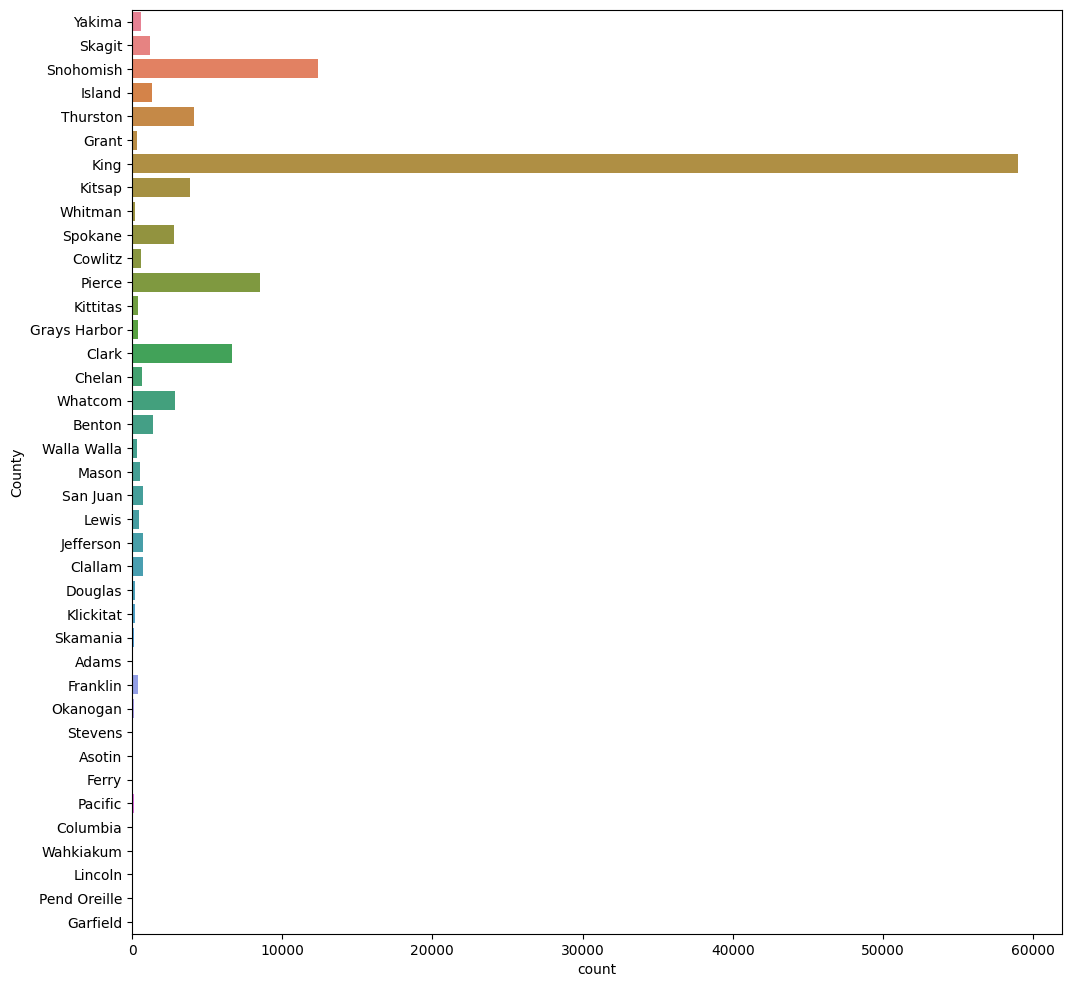

In [97]:
plt.figure(figsize = (12, 12))
sns.countplot(y = 'County', data = data, hue = 'County')
plt.show()

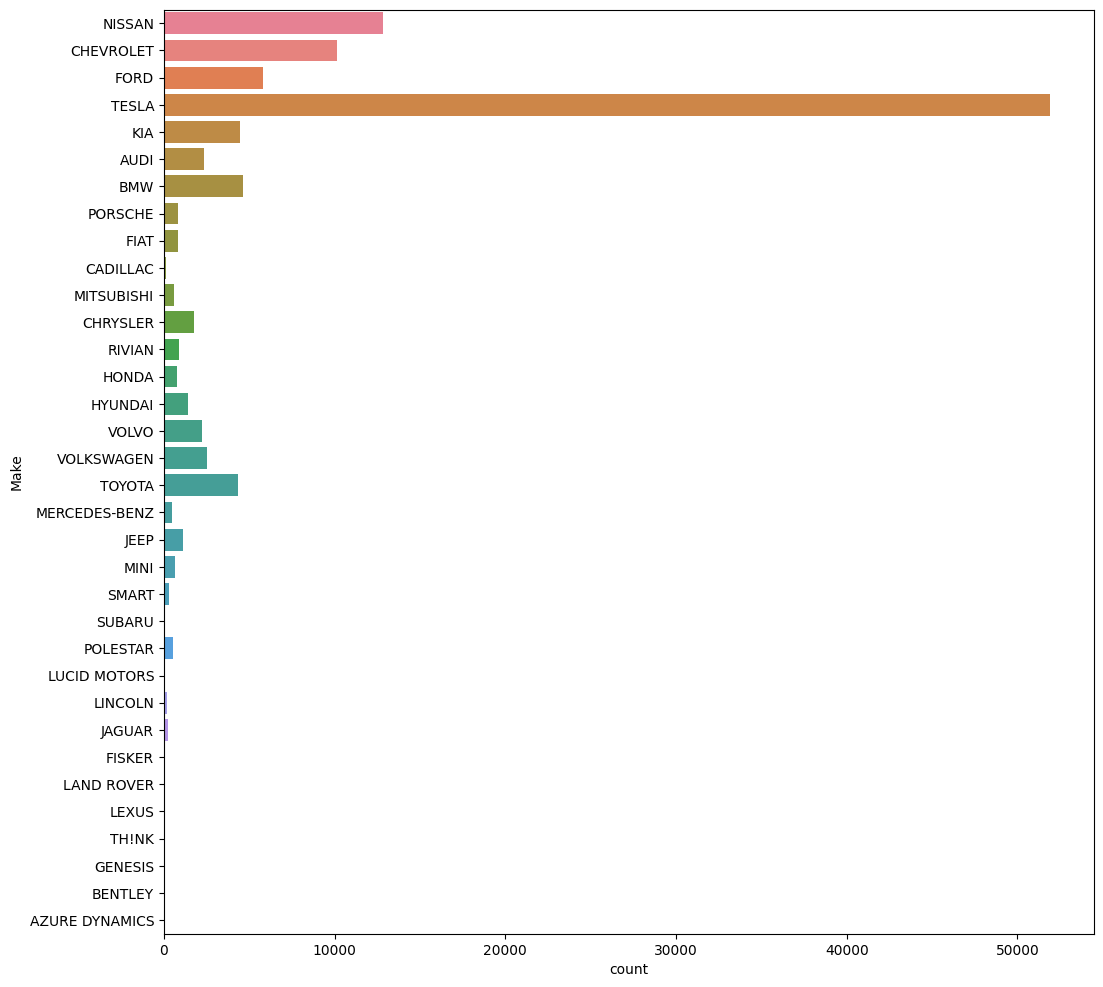

In [98]:
plt.figure(figsize = (12, 12))
sns.countplot(y = 'Make', data = data, hue = 'Make')
plt.show()

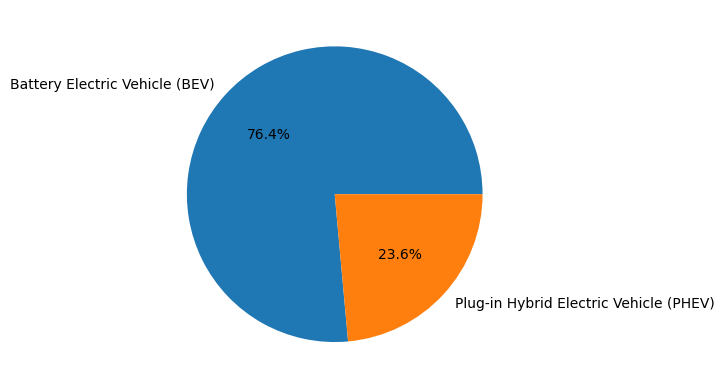

In [99]:
vehicle_type = data['Electric Vehicle Type'].value_counts()
plt.pie(vehicle_type, labels = vehicle_type.index, autopct = '%1.1f%%')
plt.show()

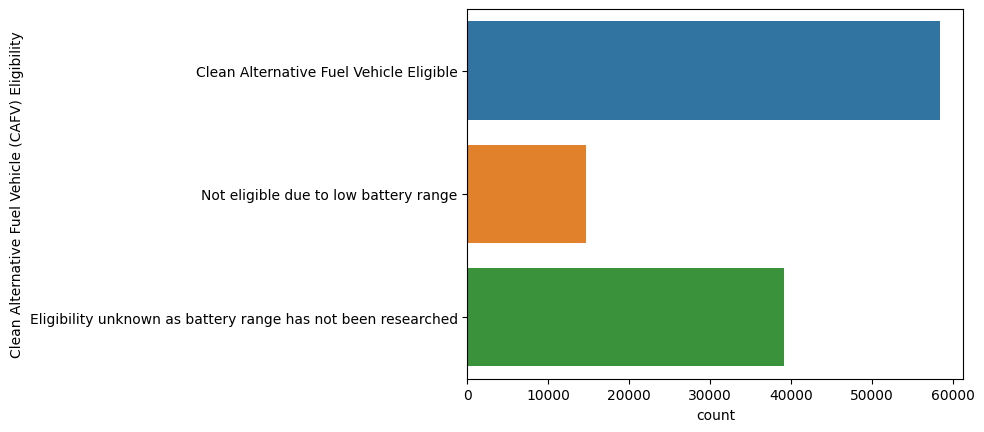

In [100]:
sns.countplot(y = 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', data = data, hue = 'Clean Alternative Fuel Vehicle (CAFV) Eligibility')
plt.show()

In [101]:
data.head()

VIN (1-10)     County      City State  Postal Code  Model Year       Make  \
2  JN1AZ0CP8B     Yakima    Yakima    WA        98901        2011     NISSAN   
3  1G1FW6S08H     Skagit  Concrete    WA        98237        2017  CHEVROLET   
4  3FA6P0SU1K  Snohomish   Everett    WA        98201        2019       FORD   
5  5YJ3E1EB5J  Snohomish   Bothell    WA        98021        2018      TESLA   
6  1N4AZ0CP4D  Snohomish   Everett    WA        98203        2013     NISSAN   

     Model                   Electric Vehicle Type  \
2     LEAF          Battery Electric Vehicle (BEV)   
3  BOLT EV          Battery Electric Vehicle (BEV)   
4   FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   
5  MODEL 3          Battery Electric Vehicle (BEV)   
6     LEAF          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
2           Clean Alternative Fuel Vehicle Eligible              73   
3           Clean Alternative Fuel Vehicle Eligible             238   
4             Not eligible due to low battery range              26   
5           Clean Alternative Fuel Vehicle Eligible             215   
6           Clean Alternative Fuel Vehicle Eligible              75   

   Base MSRP  Legislative District  DOL Vehicle ID  \
2          0                  15.0       218972519   
3          0                  39.0       186750406   
4          0                  38.0         2006714   
5          0                   1.0       475635324   
6          0                  38.0       253546023   

              Vehicle Location        Electric Utility  2020 Census Tract  
2  POINT (-120.50721 46.60448)              PACIFICORP        53077001602  
3   POINT (-121.7515 48.53892)  PUGET SOUND ENERGY INC        53057951101  
4  POINT (-122.20596 47.97659)  PUGET SOUND ENERGY INC        53061041500  
5   POINT (-122.18384 47.8031)  PUGET SOUND ENERGY INC        53061051916  
6  POINT (-122.23019 47.94949)  PUGET SOUND ENERGY INC        53061040900

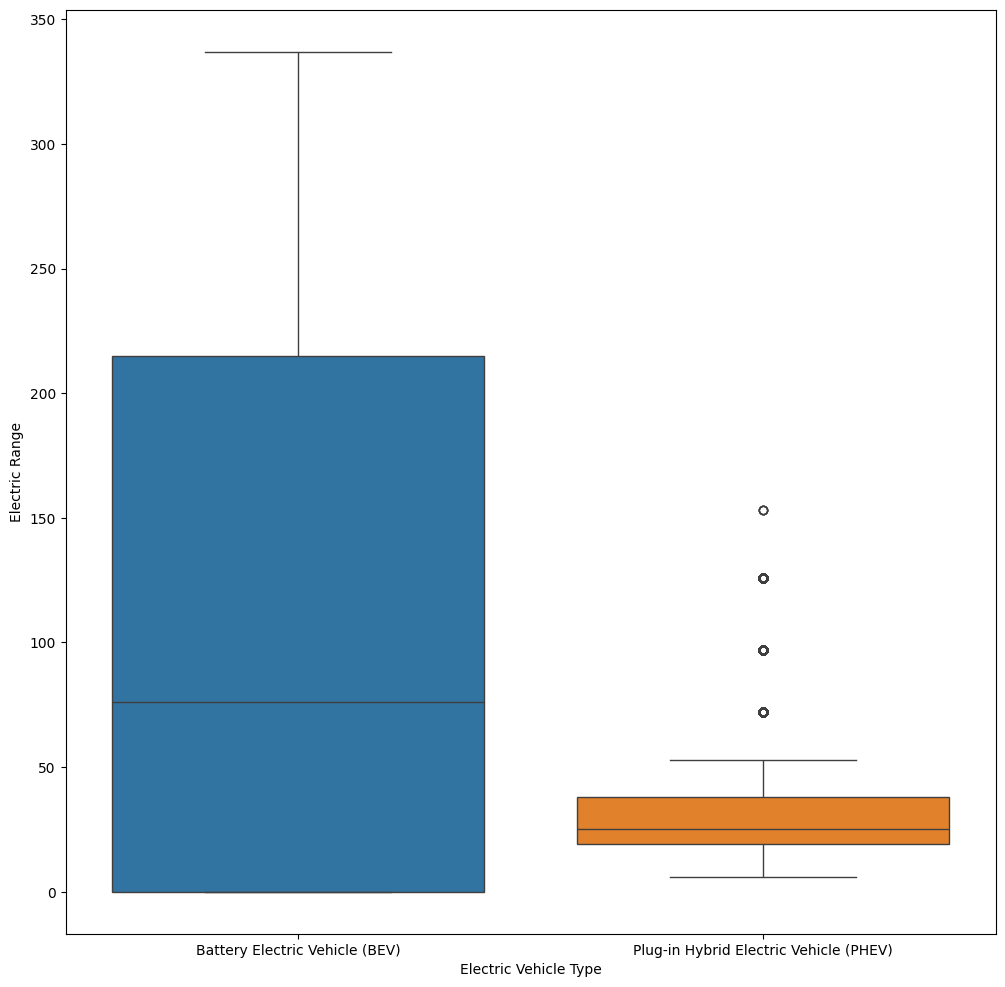

In [102]:
plt.figure(figsize = (12, 12))
sns.boxplot(y = 'Electric Range', x = 'Electric Vehicle Type', data = data, hue = 'Electric Vehicle Type' )
plt.show()

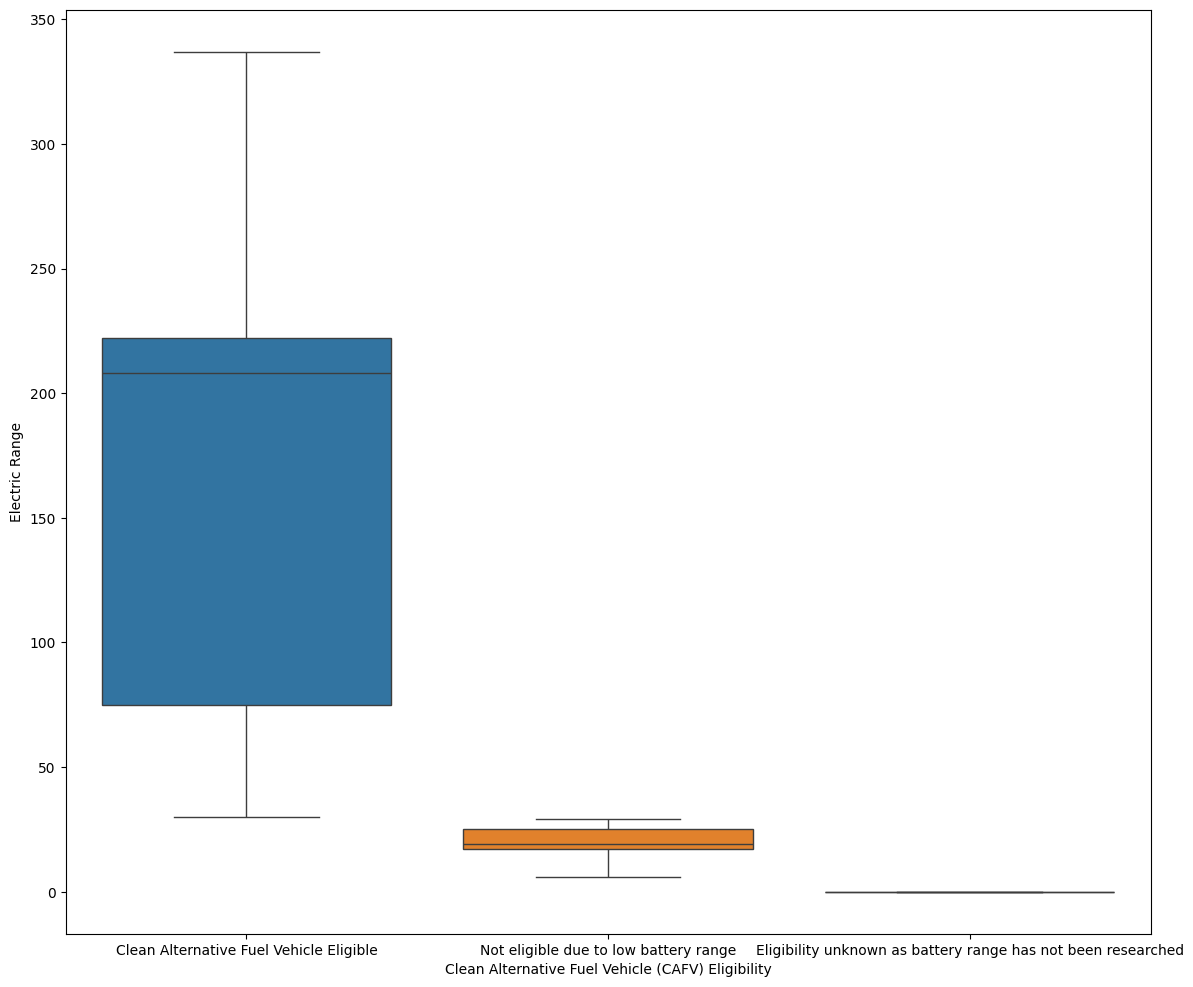

In [103]:
plt.figure(figsize = (14, 12))
sns.boxplot(y = 'Electric Range', x = 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', data = data, hue = 'Clean Alternative Fuel Vehicle (CAFV) Eligibility' )
plt.show()

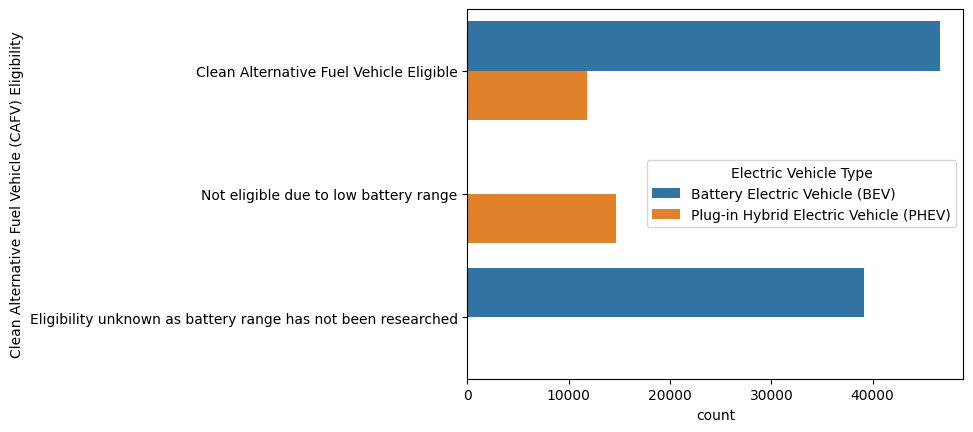

In [104]:
sns.countplot(y = 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', data = data, hue = 'Electric Vehicle Type')
plt.show()

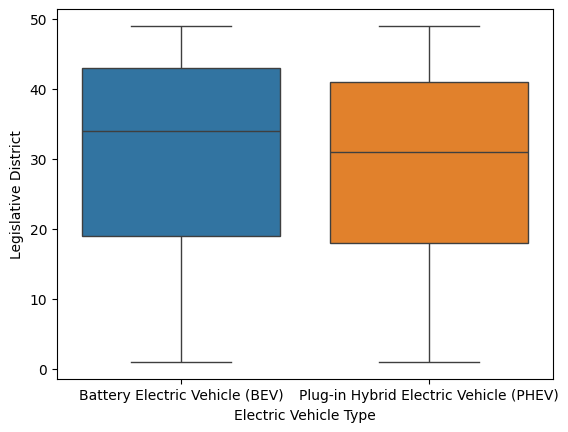

In [105]:
sns.boxplot(y = 'Legislative District', x = 'Electric Vehicle Type', data = data, hue = 'Electric Vehicle Type' )
plt.show()

In [106]:
import plotly.express as px

ev_counts = data.groupby('State').size().reset_index(name='Number of EVs')

fig = px.choropleth(
    ev_counts,
    locations='State',
    locationmode='USA-states',
    color='Number of EVs',
    color_continuous_scale='Viridis',
    scope = 'usa',
    title='Number of Electric Vehicles by State',
)

fig.show()

In [107]:
pip install bar-chart-race

In [108]:
data['Model Year'] = data['Model Year'].astype(str)

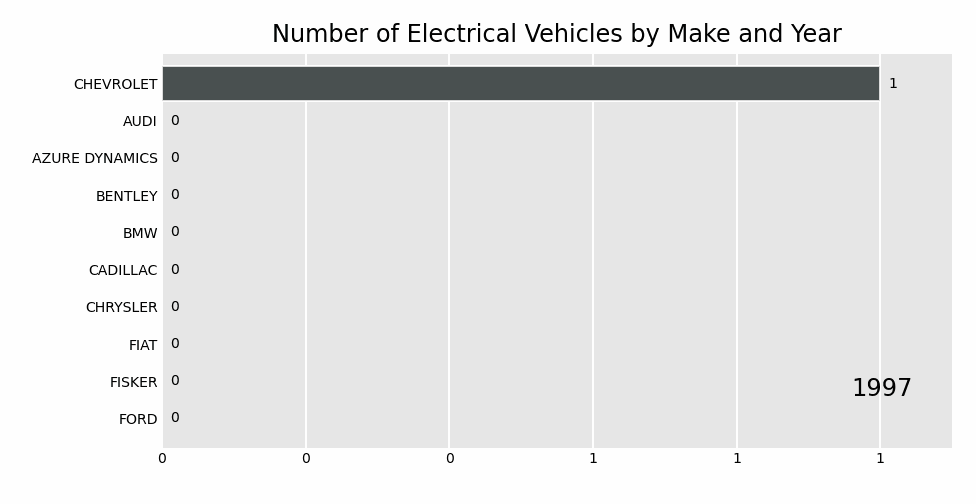

In [109]:
import bar_chart_race as bcr
from IPython.display import display, Image

ev_counts = data.groupby(['Model Year', 'Make']).size().reset_index(name='Count')
final_data = ev_counts.pivot(index = 'Model Year', columns = 'Make', values = 'Count')
final_data = final_data.fillna(0)

bcr.bar_chart_race(
    df = final_data,
    filename = 'ev_race.gif',
    orientation = 'h',
    sort = 'desc',
    n_bars = 10,
    filter_column_colors = True,
    period_length = 1000,
    title = 'Number of Electrical Vehicles by Make and Year'
)

display(Image(filename='ev_race.gif'))